In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from math import pi
import yaml
from importlib import reload as reimp

In [3]:
def get_params():
  global params
  with open('vehicle_parameters.yaml', 'r') as paramfile:
    params = yaml.safe_load(paramfile)

get_params()
print(params)

{'vehicle': {'motor': 'electric', 'mass': 300}, 'tire': {'radius': 0.2, 'MOI': 2, 'pacejka': {'b0': 1.5, 'b1': 0, 'b2': 1.4, 'b3': 0, 'b4': 0.3, 'b5': 0, 'b6': 0, 'b7': 0, 'b8': -2, 'b9': 0, 'b10': 0, 'b11': 0, 'b12': 0, 'b13': 0}}, 'aero': {'A': 1, 'Cd': 0.73, 'Cl': 0}, 'motor': {'Kv': 1.06, 'Kt': 1.1, 'R': 0.1, 'Vin': 400, 'Imax': 250, 'MOI': 0.0421}, 'trans': {'ratio': 3, 'MOI': 0.025}}


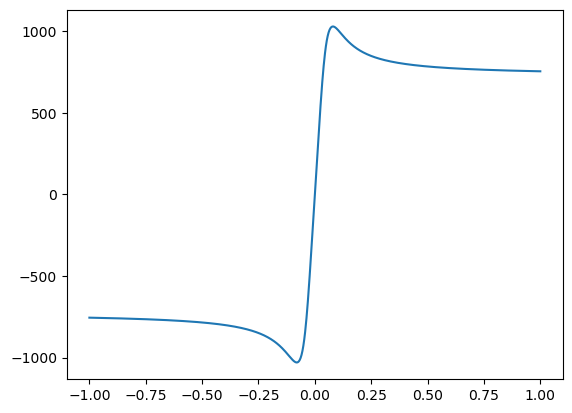

In [51]:
import pacejka
slips = np.linspace(-1, 1, 1000)
forces = pacejka.longitudinal(slips, params['vehicle']['mass']*9.81/4, params['tire']['pacejka'])
plt.plot(slips, forces)

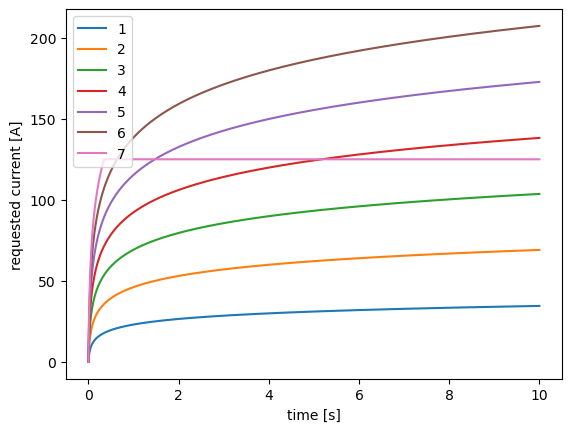

In [44]:
import dynamics
reimp(dynamics)
get_params()
vehicle = ct.NonlinearIOSystem(dynamics.updfn, dynamics.outfn, params=params)
speeds = np.zeros((10, 1000))
FLslips = np.zeros((10, 1000))
RLslips = np.zeros((10, 1000))
for i in range(1,8):
  T = np.linspace(0, 10, 1000)
  u = np.log(100*T+1)*5*i
  if i == 7: u = np.clip(u, 0, 125)
  x0 = 0.1 * np.ones(10)
  #x0[2] = 0
  out = ct.input_output_response(vehicle, U=u, T=T, X0=x0, solve_ivp_kwargs={'atol': 1e-5})
  speeds[i] = out.states[2]
  FLslips[i] = out.outputs[0]
  RLslips[i] = out.outputs[2]
  plt.plot(T, u)
plt.xlabel('time [s]'); plt.ylabel('requested current [A]')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.show()

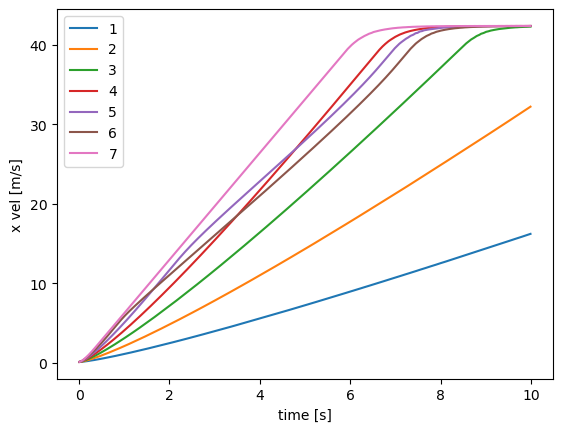

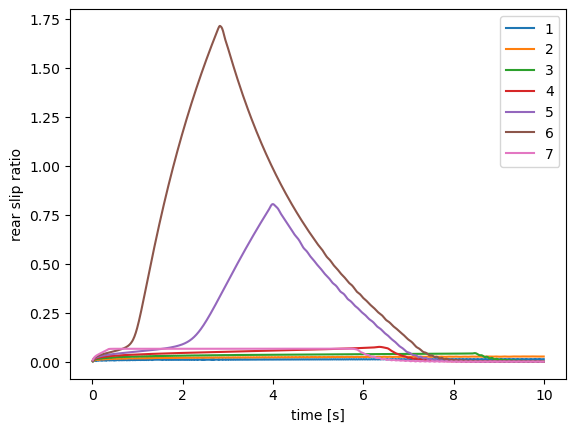

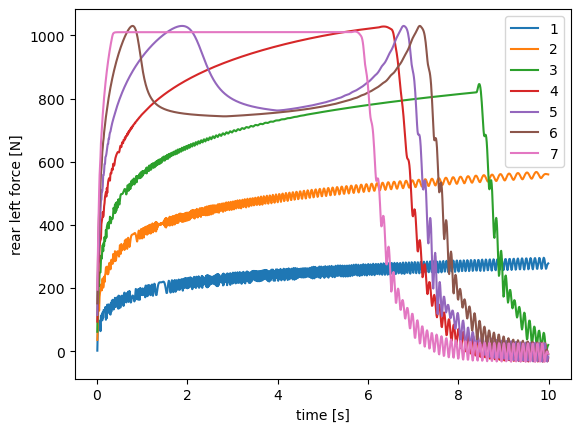

In [45]:
starttime = 0
endtime = 10
for i in range(1,8):
  plt.plot(out.time[out.time < endtime][out.time[out.time < endtime] > starttime], speeds[i][out.time < endtime][out.time[out.time < endtime] > starttime])
plt.xlabel('time [s]'); plt.ylabel('x vel [m/s]')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.show()

'''for i in range(1,8):
  plt.plot(out.time[out.time < endtime][out.time[out.time < endtime] > starttime], FLslips[i][out.time < endtime][out.time[out.time < endtime] > starttime])
plt.xlabel('time [s]'); plt.ylabel('front slip ratio')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.show()'''

for i in range(1,8):
  plt.plot(out.time[out.time < endtime][out.time[out.time < endtime] > starttime], RLslips[i][out.time < endtime][out.time[out.time < endtime] > starttime])
plt.xlabel('time [s]'); plt.ylabel('rear slip ratio')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.show()

for i in range(1,8):
  plt.plot(out.time[out.time < endtime][out.time[out.time < endtime] > starttime],  pacejka.longitudinal(RLslips[i][out.time < endtime][out.time[out.time < endtime] > starttime], params['vehicle']['mass']*9.81/4, params['tire']['pacejka']))
plt.xlabel('time [s]'); plt.ylabel('rear left force [N]')
plt.legend(['1', '2', '3', '4', '5', '6', '7'])
plt.show()